<a href="https://colab.research.google.com/github/gkmurphy/PUS2024_GMurphy/blob/ClassDemos/DNN_PUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
#target var - 1D vector
y_train.shape

(60000,)

In [6]:
#Images single color (2D) - pandas to rendering it color
x_train.shape

(60000, 28, 28)

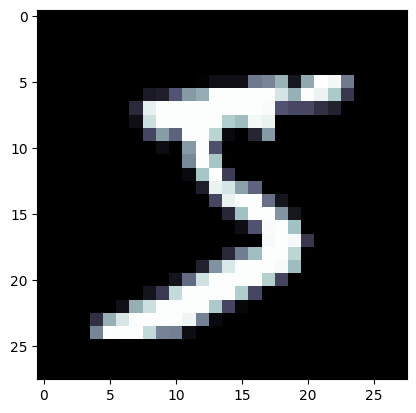

In [8]:
plt.imshow(x_train[0], cmap='bone')

In [12]:
# check how many values are in the target variable
np.unique(y_train, return_counts=True) #what are the individual values

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [17]:
# check what is the min and max value and data type of the features dataset
#8bits - can store 2^8 (255)
np.max(y_train), np.min(y_train), x_train.dtype

(9, 0, dtype('uint8'))

In [20]:
testvar = np.array([255]).astype('uint8')
testvar + np.uint8(1) #I missed why this is a problem...

array([0], dtype=uint8)

In [21]:
# scale the imput data so that it is min=0 and max=1 (min-max scaling)
#scaling all of this down to 0 and 1... I should have already learned this

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
28*28

input_shape = x_train.shape[1:]
input_shape

(28, 28)

In [25]:
# architecture hyperparametrs
# have to run NN on GPU (not CPU) - because it's parallelized


model1 = tf.keras.models.Sequential() #not recurrent - forward then backward
model1.add(tf.keras.layers.Flatten(input_shape=(28,28))) #flatten from 28 28 to 784

#no relu means you're just doing a linear network
model1.add(tf.keras.layers.Dense(128, activation='relu')) #dense refers to connectivity ; every neuron connects to every node in the next layer
model1.add(tf.keras.layers.Dense(10, activation = 'relu'))
model1.add(tf.keras.layers.Dense(1, activation = 'linear')) #don't change the values on the last (output) layer


# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer with 10 neurons
# add the output  layer with 1
# your code goes here



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


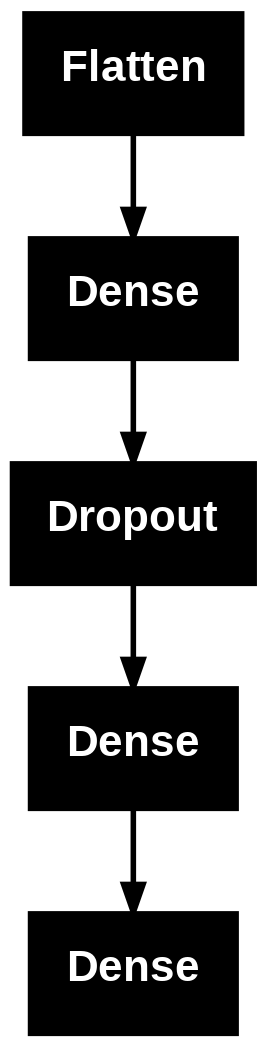

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# training hyperparameter
# choose the MeanSquaredError and Adam as the optimizer

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
model.compile(optimizer = optimizer, loss = loss_fn,
              metrics=['accuracy'])
training_history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.1341 - loss: 3.4899
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1408 - loss: 1.4298
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1461 - loss: 1.2015
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1457 - loss: 1.1101
Epoch 5/5


In [ ]:
plt.plot(training_history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale('log')


In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
model.predict(x_test[:5])

In [ ]:
# is this model overfitting? how woudl you find out?

In [ ]:
y_test[:5]

In [ ]:
# modify the architecture hyperparametrs
# set the last layer to a 10 nerons dense layer and set the softmax as the activation function for the last layer
prob_model = tf.keras.models.Sequential()
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer with 10 neurons
# your code goes hereprob_model.summary()

In [ ]:
model.summary()


In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
#set the loss to be SparseCategoricalCrossentropy(), the optimizer to Adam and compile and fit as before
loss = ...
optimizer = ...
prob_model.compile...
prob_training_history = ...

In [ ]:
prob_model.evaluate(x_test, y_test)

In [ ]:
result = prob_model.predict(x_test[:10])

In [ ]:
result

In [ ]:
plt.imshow(x_test[8])

In [ ]:
for i,result in enumerate(prob_model.predict(x_test[:10])):
  plt.figure(figsize=(10,3))
  plt.plot(range(10), result, label=y_test[i])
  plt.plot(range(10)[np.argmax(result)], np.max(result), '.')
  plt.axvline(range(10)[np.argmax(result)])
  plt.legend()
  plt.xlabel("value")
  plt.ylabel('predicted "probability" ')
  plt.show()